# **Assignment 4, Quantum Computer Programming 2020**

> Hans Toquica, hmtoquicac@unal.edu.co

> Diego Vega, davegav@unal.edu.co

> Sneyder Gantiva, esgantivar@unal.edu.co

# Installing Qiskit

In [1]:
!pip install qiskit -q
!pip install pylatexenc -q
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     |████████████████████████████████| 8.5MB 5.8MB/s 
     |████████████████████████████████| 17.6MB 255kB/s 
     |████████████████████████████████| 204kB 51.3MB/s 
     |████████████████████████████████| 204kB 49.6MB/s 
     |████████████████████████████████| 2.1MB 46.5MB/s 
     |████████████████████████████████| 1.3MB 46.5MB/s 
     |████████████████████████████████| 5.9MB 42.9MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 194kB 49.6MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 614kB 42.6MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 2.6MB 42.5MB/s 
     |████████████████████████████████| 5.5MB 44.2MB/s 
     |████████████████████████████████| 163kB 5.9MB/s 
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-wc201btc
  Running command git clone -q https://github.com/qiskit-community/q

In [2]:
from qiskit_textbook.tools import array_to_latex ## Printing arrays in latex from code cells

In [3]:
# Beautify Printing Helper Function
def getLTXstr(unitary, pretextInput):
    a = array_to_latex(unitary, pretext=pretextInput, display_output=False)
    a = a.replace("$$","")
    return a

# Set 1

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
qiskit.__qiskit_version__
from IPython.display import Math ## LaTeX arrays in code cells
from qiskit.quantum_info.operators import Operator ## Create operators from matrices

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

## NOT Gate

In [ ]:
def NOT(input):

    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if input=='1':
        qc.x( q[0] )
        
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x( q[0] )
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure( q[0], c[0] )
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1)
    output = next(iter(job.result().get_counts()))
    
    return output

In [ ]:
print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input))


Results for the NOT gate
    Input 0 gives output 1
    Input 1 gives output 0


## XOR Gate

In [ ]:
def XOR(input1,input2):
    
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    if input1=='1':
        qc.x( q[0] )
    if input2=='1':
        qc.x( q[1] )

    qc.cx(q[0],q[1])

    qc.measure(q[1],c[0])
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [ ]:
print('\nResults for the XOR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',XOR(input1,input2))


Results for the XOR gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 0


## AND Gate

In [ ]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    if input1=='1':
        qc.x( q[0] )
    if input2=='1':
        qc.x( q[1] )
    qc.ccx(q[0], q[1], q[2])
    qc.measure(q[2],c[0])
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [ ]:
print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',AND(input1,input2))


Results for the AND gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 0
    Inputs 1 0 give output 0
    Inputs 1 1 give output 1


## NAND Gate

In [ ]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    if input1=='1':
        qc.x( q[0] )
    if input2=='1':
        qc.x( q[1] )
    qc.ccx(q[0], q[1], q[2])
    qc.x(q[2])
    qc.measure(q[2],c[0])
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [ ]:
print('\nResults for the NAND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',NAND(input1,input2))


Results for the NAND gate
    Inputs 0 0 give output 1
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 0


## OR Gate

In [ ]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    if input1=='1':
        qc.x( q[0] )
    if input2=='1':
        qc.x( q[1] )

    qc.x( q[0] )
    qc.x( q[1] )
    qc.ccx(q[0], q[1], q[2])
    qc.x( q[2] )
    qc.measure(q[2],c[0])
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [ ]:
print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',OR(input1,input2))


Results for the OR gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 1


# Set 2

## 1

Show that the Hadamard gate can be written in the following two forms
$$H = \frac{X+Z}{\sqrt{2}}\equiv e^{i\frac{\pi}{2}\frac{X+Z}{\sqrt{2}}}$$

First lets prove the first equality: Take into account the matrix form of the Hadamard gate ($H$) and the Pauli gates $X$ and $Z$:
$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\1 & -1\end{pmatrix} \;,\\
X = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix} \;,\\
Z = \begin{pmatrix}1 & 0\\0 & -1\end{pmatrix} \;.
$$

*Ergo* the expression $\frac{X+Z}{\sqrt{2}}$ can be written as

$$
\frac{X+Z}{\sqrt{2}} = \frac{\begin{pmatrix}0 & 1\\1 & 0\end{pmatrix} + \begin{pmatrix}1 & 0\\0 & -1\end{pmatrix}}{\sqrt{2}}\\
= \frac{\begin{pmatrix}1 & 1\\1 & -1\end{pmatrix}}{\sqrt{2}}\\
= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\1 & -1\end{pmatrix}
$$

**the latter expression is basically the same as the Hadamard matricial form**, *id est*, $H = \frac{X+Z}{\sqrt{2}}$

Using qiskit:

In [ ]:
backend = Aer.get_backend('unitary_simulator')

# Retrieve the unitary matrices for each gate

qc = QuantumCircuit(1)
qc.h(0)
unitaryH = execute(qc,backend).result().get_unitary()
display(Math(getLTXstr(unitaryH, "\\text{H = }\n")))

qc = QuantumCircuit(1)
qc.x(0)
unitaryX = execute(qc,backend).result().get_unitary()
display(Math(getLTXstr(unitaryX, "\\text{X = }\n")))

qc = QuantumCircuit(1)
qc.z(0)
unitaryZ = execute(qc,backend).result().get_unitary()
display(Math(getLTXstr(unitaryZ, "\\text{Z = }\n")))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
## Creating the equivalent from the unitary matrices

hadamardEquivalent = (unitaryX + unitaryZ)/(2**(1/2)) ## Creating the matrix form
hadamardEquivalent = Operator(hadamardEquivalent)     ## Converting the matrix to an operator

qc = QuantumCircuit(1)
qc.unitary(hadamardEquivalent, 0)                     ## Applying the unitary operator to the new circuit

unitaryhadamardEquivalent = execute(qc,backend).result().get_unitary()
display(Math(getLTXstr(unitaryhadamardEquivalent, "\\frac{X+Z}{\sqrt{2}} = \n")))

<IPython.core.display.Math object>

**Now let's try the second equality** (which was specified to be valid up to the global phase and, *ergo*, phisically equivalent)

Let

$$M = \frac{X+Z}{\sqrt{2}}$$

Then

$$e^{i\frac{\pi}{2}M} = \cos \frac{\pi}{2}M + i\sin \frac{\pi}{2}M\tag{1}$$

Recall that by Taylor series expansion

$$
\begin{align}
\cos X = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}X^{2n}\;,\tag{2}\\
\sin X = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}X^{2n+1}\;\tag{3},
\end{align}
$$

*ergo*, replacing $X$ in $(2)$ and $(3)$ by our expression in the trigonometric identities in $(1)$ we obtain

$$
\begin{align}
\cos \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}M\right)^{2n}\;,\\
\sin \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}M\right)^{2n+1}\;.
\end{align}
$$

The latter expressions can be rewritten as
$$
\begin{align}
\cos \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n}M^{2n}\;,\tag{4}\\
\sin \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n+1}M^{2n+1}\;.\tag{5}
\end{align}
$$

Let's recall that $M^2 = I$ (according to the exercise), then

$$
\begin{align}
M^{2n} = I\quad\forall\quad n = \{0,1,2,3,\dots,\infty\},\\
M^{2n+1} = M\quad\forall\quad n = \{0,1,2,3,\dots,\infty\},
\end{align}
$$

so we can rewrite $(4)$ and $(5)$ as

$$
\begin{align}
\cos \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n}I\;,\tag{6}\\
\sin \frac{\pi}{2}M = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n+1}M\;.\tag{7}
\end{align}
$$

Recall that $\sum_n cx_n = c\sum_n x_n$ and note that $I$ in $(6)$ and $M$ in $(7)$ are not affected by $n$ and can be treated as constants, *ergo*

$$
\begin{align}
\cos \frac{\pi}{2}M = I\sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n}\;,\\
\sin \frac{\pi}{2}M = M\sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}\left(\frac{\pi}{2}\right)^{2n+1}\;,
\end{align}
$$

which leads us to

$$
\begin{align}
\cos \frac{\pi}{2}M = I\cos\frac{\pi}{2}=0\;,\tag{8}\\
\sin \frac{\pi}{2}M = M\sin\frac{\pi}{2}=M\;.\tag{9}
\end{align}
$$

By replacing $(8)$ and $(9)$ in $(1)$ we obtain

$$e^{i\frac{\pi}{2}M} = iM$$

or

$$e^{i\frac{\pi}{2}\frac{X+Z}{\sqrt{2}}} = i\frac{X+Z}{\sqrt{2}}$$

we can see that

$$\frac{X+Z}{\sqrt{2}} \equiv i\frac{X+Z}{\sqrt{2}}$$

where this equivalence is valid up to the global phase.

### 2

The Hadamard can be constructed from `rx` and `rz` operations as



$$ R_x(\theta) = e^{i\frac{\theta}{2} X}, ~~~ R_z(\theta) = e^{i\frac{\theta}{2} Z},\\ H \equiv \lim_{n\rightarrow\infty} \left( ~R_x\left(\frac{\theta}{n}\right) ~~R_z \left(\frac{\theta}{n}\right) ~\right)^n.$$



For some suitably chosen $\theta$. When implemented for finite $n$, the resulting gate will be an approximation to the Hadamard whose error decreases with $n$.

The following shows an example of this implemented with Qiskit with an incorrectly chosen value of $\theta$ (and with the global phase ignored).

* Determine the correct value of $\theta$.

* Show that the error (when using the correct value of $\theta$) decreases quadratically with $n$.

Given:

$$H = exp\left(i\frac{\pi}{2}\frac{X + Z}{\sqrt{2}}\right) \tag{1}$$

The definition of $R_x$ and $R_Z$:

$$R_x(\theta) = exp\left(i\frac{\theta}{2} X\right), ~~~ R_z(\theta) = exp\left(i\frac{\theta}{2} Z\right) \tag{2}$$

and equivalence of $H$ gate:

$$H \equiv \lim_{n\rightarrow\infty} \left( ~R_x\left(\frac{\theta}{n}\right) ~~R_z \left(\frac{\theta}{n}\right) ~\right)^n \tag{3}$$

Taking $n = 1$ from (3):

$$H \approx R_x(\theta)~R_y(\theta)$$

$$H \approx exp\left(i\frac{\theta}{2} X\right) ~ exp\left(i\frac{\theta}{2} Z\right)$$

$$H \approx exp\left[ i \frac{\theta}{2} \left( X + Z \right) \right] \tag{4}$$

from (1) and (4):

$$ exp\left(i\frac{\pi}{2}\frac{X + Z}{\sqrt{2}}\right) ~ \approx ~ exp\left[ i \frac{\theta}{2} \left( X + Z \right) \right]$$

$$i\frac{\pi}{2}\frac{X + Z}{\sqrt{2}} ~ \approx ~ i \frac{\theta}{2} \left( X + Z \right)$$
so, 
$$ \frac{\pi}{\sqrt{2}}~\approx~\theta $$

The approximate correct value of $\theta$ is $\frac{\pi}{\sqrt{2}}$ 

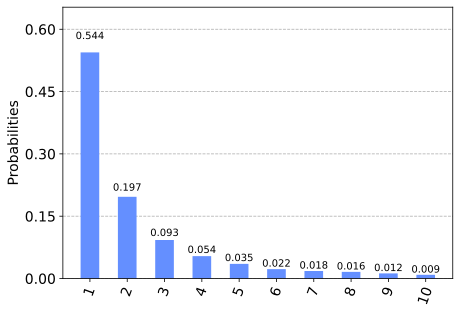

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11): 

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi / np.sqrt(2) # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximation, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)

We plot error to view the behavior of error through n iterations 

In [ ]:
error_list = [i[1] for i in error.items()]

Text(0, 0.5, 'Probabilities')

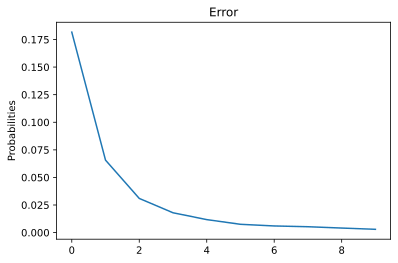

In [ ]:
plt.plot(error_list)
plt.title('Error')
plt.ylabel('Probabilities')

We can see that the curve of error has an inverse quadratic behavior.

For evaluate this hypothesis we apply inverse of cuadratic to the error data, and generate the follow curve.

Text(0, 0.5, 'Probabilities')

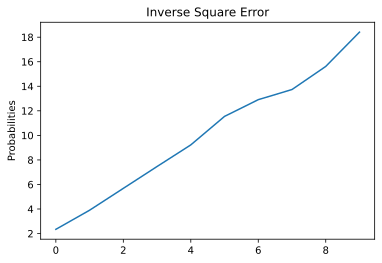

In [ ]:
plt.plot([i ** (-1/2) for i in error_list])
plt.title('Inverse Square Error')
plt.ylabel('Probabilities')

> The linear trend of the inverse of the square of the error shows us that the error decays in a quadratic way

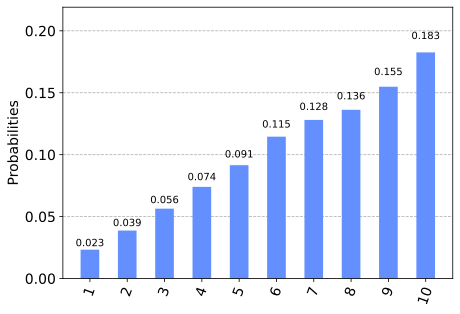

In [ ]:
inverse_square_of_error = {}
for n in error:
    inverse_square_of_error[n] = (error[n])**(-1/2)
plot_histogram(inverse_square_of_error)

### 3

An improved version of the approximation can be found from,



$$H \equiv \lim_{n\rightarrow\infty} \left( ~ R_z \left(\frac{\theta}{2n}\right)~~ R_x\left(\frac{\theta}{n}\right) ~~ R_z \left(\frac{\theta}{2n}\right) ~\right)^n.$$



Implement this, and investigate the scaling of the error.

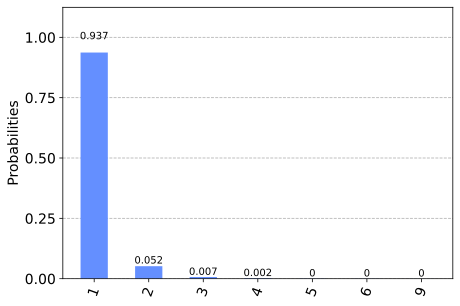

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error_2 = {}
for n in range(1,11): 
    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi / np.sqrt(2) # here we choose theta=pi/(2)^(1/2)
    for j in range(n):
        qc.rz(theta / (2 * n), q[0])
        qc.rx(theta / n, q[0])
        qc.rz(theta / (2 * n), q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximation, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error_2[n] = (job.result().get_counts()['1']/shots)
    except:      
        pass
plot_histogram(error_2)

We plot error to view the behavior of error through n iterations 

In [ ]:
error_2_list = [i[1] for i in error_2.items()]

Text(0, 0.5, 'Probabilities')

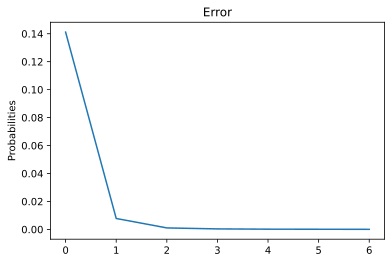

In [ ]:
plt.plot(error_2_list)
plt.title('Error')
plt.ylabel('Probabilities')

We try to find a linear trend on the error using inverse square, the results as depicted in the follow curve.

Text(0, 0.5, 'Probabilities')

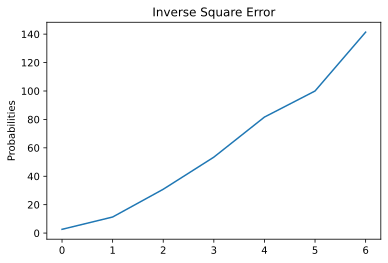

In [ ]:
plt.plot([i ** (-1/2) for i in error_2_list])
plt.title('Inverse Square Error')
plt.ylabel('Probabilities')

With the previous curve we can see that the behavior of error isn't inverse square

We try to find a linear trend on the error using inverse cube, the results as depicted in the follow curve.

Text(0, 0.5, 'Probabilities')

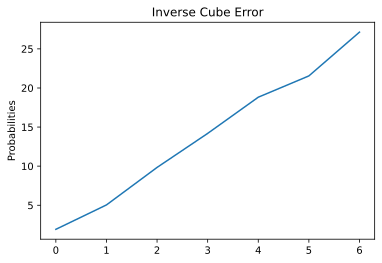

In [ ]:
plt.plot([(i ** (-1/3)) for i in error_2_list])
plt.title('Inverse Cube Error')
plt.ylabel('Probabilities')

We can see that the previous curve has a linear trend, so we can conclude that the error decay in a cube way

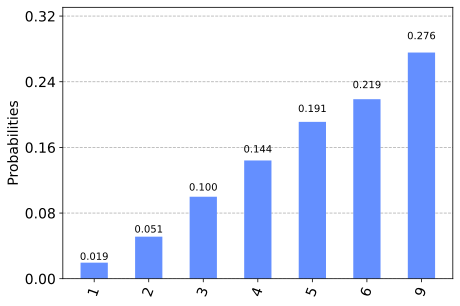

In [ ]:
inverse_cube_of_error = {}
for n in error_2:
    error_2[n]
    inverse_cube_of_error[n] = (error_2[n])**(-1/3)
plot_histogram(inverse_cube_of_error)

## Problem Set 3: Building the Best AND Gate

In Problem Set 1, you made an AND gate with quantum gates. This time you'll do the same again, but for a real device. Using real devices gives you two major constraints to deal with. One is the connectivity, and the other is noise.

The connectivity tells you what cx gates it is possible to do perform directly. For example, the device ibmq_5_tenerife has five qubits numbered from 0 to 4. It has a connectivity defined by

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
from qiskit.providers.aer import noise
import numpy as np
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]

Here the [1,0] tells us that we can implement a cx with qubit 1 as control and qubit 0 as target, the [2,0] tells us we can have qubit 2 as control and 0 as target, and so on. These are the cx gates that the device can implement directly.

The 'noise' of a device is the collective effects of all the things that shouldn't happen, but nevertheless do happen. Noise results in the output not always having the result we expect. There is noise associated with all processes in a quantum circuit: preparing the initial states, applying gates and measuring the output. For the gates, noise levels can vary between different gates and between different qubits. The cx gates are typically more noisy than any single qubit gate.

We can also simulate noise using a noise model. And we can set the noise model based on measurements of the noise for a real device. The following noise model is based on ibmq_5_tenerife.

In [ ]:
noise_dict = {'errors': [{'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0004721766167523067, 0.0004721766167523067, 0.0004721766167523067, 0.9985834701497431], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.000901556048412383, 0.000901556048412383, 0.000901556048412383, 0.9972953318547628], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0011592423249461303, 0.0011592423249461303, 0.0011592423249461303, 0.9965222730251616], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0009443532335046134, 0.0009443532335046134, 0.0009443532335046134, 0.9971669402994862], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.001803112096824766, 0.001803112096824766, 0.001803112096824766, 0.9945906637095256], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0023184846498922607, 0.0023184846498922607, 0.0023184846498922607, 0.9930445460503232], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.9672573379090872], 'gate_qubits': [[1, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.9699888805021712], 'gate_qubits': [[2, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.9627184072576159], 'gate_qubits': [[2, 1]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.9437457618579164], 'gate_qubits': [[3, 2]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.9339816349935997], 'gate_qubits': [[3, 4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.9307167621063416], 'gate_qubits': [[4, 2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9372499999999999, 0.06275000000000008], [0.06275000000000008, 0.9372499999999999]], 'gate_qubits': [[0]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9345, 0.0655], [0.0655, 0.9345]], 'gate_qubits': [[1]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.97075, 0.029249999999999998], [0.029249999999999998, 0.97075]], 'gate_qubits': [[2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9742500000000001, 0.02574999999999994], [0.02574999999999994, 0.9742500000000001]], 'gate_qubits': [[3]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.8747499999999999, 0.12525000000000008], [0.12525000000000008, 0.8747499999999999]], 'gate_qubits': [[4]]}], 'x90_gates': []}
noise_model = noise.noise_model.NoiseModel.from_dict( noise_dict )

/usr/local/lib/python3.6/dist-packages/qiskit/providers/aer/noise/noise_model.py:439: DeprecationWarning: This function is deprecated and will be removed in a future release. To use an X90 based noise model use the Sqrt(X) "sx" gate and one of  the single-qubit phase gates "u1", "rx", "p" in the noise model and  basis gates to decompose into this gateset for noise simulations.
  DeprecationWarning)


Running directly on the device requires you to have an IBMQ account, and for you to sign in to it within your program. In order to not worry about all this, we'll instead use a simulation of the 5 qubit device defined by the constraints set above.

In [ ]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

In [ ]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # The keyword q_1 specifies the qubit used to encode input1
    # The keyword q_2 specifies    qubit used to encode input2
    # The keyword q_out specifies    qubit to be as output
    
    qc = QuantumCircuit(qr, cr)
    
    # prepare input on qubits q1 and q2
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # the AND just needs a c
    qc.measure(qr[ q_out ],cr[0]) # output from qubit 1 is measured
    
    # the circuit is run on a simulator, but we do it so that the noise and connectivity of Tenerife are also reproduced 
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

For example, here are the results when both inputs are 0.

{'0': 9010, '1': 990}


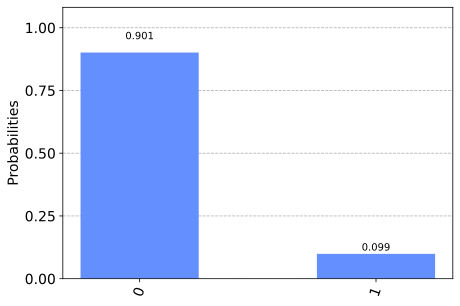

In [ ]:
result = AND('0','0')
print( result )
plot_histogram( result )

We'll compare across all results to find the most unreliable.

In [ ]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9036

Probability of correct answer for inputs 0 1
0.908

Probability of correct answer for inputs 1 0
0.9044

Probability of correct answer for inputs 1 1
0.8973

The lowest of these probabilities was 0.8973


The AND function above uses the ccx gate the implement the required operation. But you now know how to make your own. Find a way to implement an AND for which the lowest of the above probabilities is better than for a simple ccx.

**SOLUTION**
It is importante to point out the fact that the error values shown in this test can vary during each execution.

As it is explained, the qubits in the ibmq_5_tenerife have an associated error and this error can be measure with a simple rotation of the circuit

In [ ]:
qc = QuantumCircuit(qr, cr)
qc.measure(qr[0],cr[0])
job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
output = job.result().get_counts()
print('Probability of incorrect output for qubit',0,'is',output['1']/10000)

Probability of incorrect output for qubit 0 is 0.0614


In [ ]:
qc = QuantumCircuit(qr, cr)
qc.measure(qr[1],cr[0])
job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
output = job.result().get_counts()
print('Probability of incorrect output for qubit',1,'is',output['1']/10000)

Probability of incorrect output for qubit 1 is 0.0646


In [ ]:
qc = QuantumCircuit(qr, cr)
qc.measure(qr[2],cr[0])
job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
output = job.result().get_counts()
print('Probability of incorrect output for qubit',2,'is',output['1']/10000)

Probability of incorrect output for qubit 2 is 0.0306


In [ ]:
qc = QuantumCircuit(qr, cr)
qc.measure(qr[3],cr[0])
job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
output = job.result().get_counts()
print('Probability of incorrect output for qubit',3,'is',output['1']/10000)

Probability of incorrect output for qubit 3 is 0.0235


In [ ]:
qc = QuantumCircuit(qr, cr)
qc.measure(qr[4],cr[0])
job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
output = job.result().get_counts()
print('Probability of incorrect output for qubit',4,'is',output['1']/10000)

Probability of incorrect output for qubit 4 is 0.1211


The qubit 4 is the worst with a 12.11% of errror And the bests are the qubits 2 and 3 with 3.06% and 2.35%. So we are going to try to use these ones in the already programmed AND gate but changing the IN and OUT qubits. Unforunatly we need 3 qubits that are connectable in order to use the TOFFOLI Gate, and the only gruop that fits following the coupling_map are qubits 2,3 and 4.

In [ ]:
worst = 1
for input1 in ['0','1']:
  for input2 in ['0','1']:
    print('\nProbability of correct answer for inputs',input1,input2)
    prob = AND(input1,input2, q_1=3,q_2=4,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
    print( prob )
    worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.8487

Probability of correct answer for inputs 0 1
0.8491

Probability of correct answer for inputs 1 0
0.8574

Probability of correct answer for inputs 1 1
0.8535

The lowest of these probabilities was 0.8487


This gives us the lowest local error of 84.98%, which is not the expected one.
So now we are going to change the way the gate is used, throught out a definition of a AND gate using controlled-Z and controlled-H gates.

This is, that we can do a $X$ gate with the gates: $HZH$, so what its done here is to convert those 2 gates ($H$ and $Z$) in controlled gates associated to each one of the input qubits, whis way we have an AND gate represented with gates that have less error asociated.

In [ ]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
  # The keyword q_1 specifies the qubit used to encode input1
  # The keyword q_2 specifies  qubit used to encode input2
  # The keyword q_out specifies  qubit to be as output
  
  qc = QuantumCircuit(qr, cr)
  
  # prepare input on qubits q1 and q2
  if input1=='1':
    qc.x( qr[ q_1 ] )
  if input2=='1':
    qc.x( qr[ q_2 ] )
  
  # instead of using qc.ch(qr[q_1],qr[q_out]), we use this equivalency, because the CH gate uses a lot of unitary gates in the circuit
  qc.ry(-np.pi/4,qr[q_out])
  qc.cx(qr[q_1],qr[q_out])
  qc.ry(np.pi/4,qr[q_out])
  
  qc.cz(qr[q_2],qr[q_out])

  # instead of using qc.ch(qr[q_1],qr[q_out]), we use this equivalency, because the CH gate uses a lot of unitary gates in the circuit  
  qc.ry(-np.pi/4,qr[q_out])
  qc.cx(qr[q_1],qr[q_out])
  qc.ry(np.pi/4,qr[q_out])
  
  qc.measure(qr[ q_out ],cr[0]) # output from qubit 1 is measured
  
  # the circuit is run on a simulator, but we do it so that the noise and connectivity of Tenerife are also reproduced 
  job = execute(qc, backend, shots=10000, noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=noise_model.basis_gates)
  output = job.result().get_counts()
  
  return output

In [ ]:
worst = 1
for input1 in ['0','1']:
  for input2 in ['0','1']:
    print('\nProbability of correct answer for inputs',input1,input2)
    prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
    print( prob )
    worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9137

Probability of correct answer for inputs 0 1
0.9164

Probability of correct answer for inputs 1 0
0.9127

Probability of correct answer for inputs 1 1
0.9112

The lowest of these probabilities was 0.9112


Here we managed to obtain a 91.12% of accuracy, this is a better result. We can see that the idea of using different input and output qubits was nos used in the end, this because it was evident that the qubit 4 was affecting more the output than the qubits 2 and 3 were helping.

In the end the answere was to use the following circuit as the AND gate.

In [ ]:
qc = QuantumCircuit(qr, cr)

qc.ry(-np.pi/4,qr[2])
qc.cx(qr[0],qr[2])
qc.ry(np.pi/4,qr[2])

qc.cz(qr[1],qr[2])

qc.ry(-np.pi/4,qr[2])
qc.cx(qr[0],qr[2])
qc.ry(np.pi/4,qr[2])

print('Final circuit')
print(qc)

Final circuit
                                                                 
qr_0: ──────────────■──────────────────────────────■─────────────
                    │                              │             
qr_1: ──────────────┼──────────────■───────────────┼─────────────
      ┌──────────┐┌─┴─┐┌─────────┐ │ ┌──────────┐┌─┴─┐┌─────────┐
qr_2: ┤ RY(-π/4) ├┤ X ├┤ RY(π/4) ├─■─┤ RY(-π/4) ├┤ X ├┤ RY(π/4) ├
      └──────────┘└───┘└─────────┘   └──────────┘└───┘└─────────┘
qr_3: ───────────────────────────────────────────────────────────
                                                                 
qr_4: ───────────────────────────────────────────────────────────
                                                                 
cr: 1/═══════════════════════════════════════════════════════════
                                                                 
